# Credit Card Fraud Detection

## Importing Libraries

In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import the 'warnings' module and configure it to ignore warnings
import warnings

# The 'warnings.filterwarnings' function is used to filter and handle warnings.
# In this case, it's configured to ignore all warnings ('ignore').
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from catboost import CatBoostClassifier

## Importing data and preprocessing

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data[data.columns[data.isna().any()]].isna().sum()

Series([], dtype: float64)

No Missing Values

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

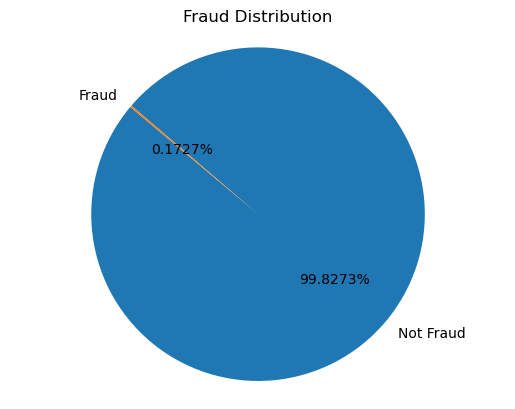

In [7]:
 # Count the unique values
fraud_count = data.Class.value_counts().reset_index()

# Map the labels
fraud_count['Label'] = fraud_count['index'].map({0: 'Not Fraud', 1: 'Fraud'})

plt.pie(fraud_count['Class'], labels=fraud_count['Label'], autopct='%1.4f%%', startangle=140)
plt.axis('equal')
plt.title(f'Fraud Distribution')   
plt.show()

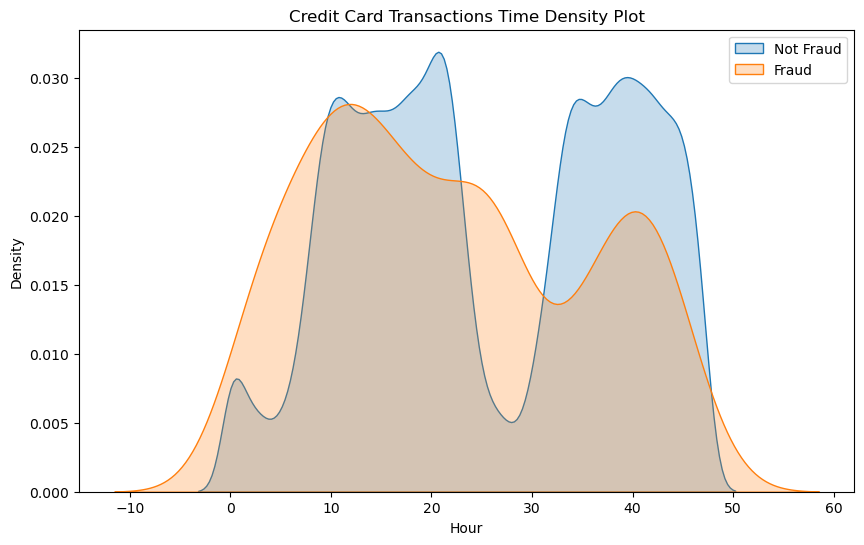

In [8]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))
# Données
class_0 = data.loc[data['Class'] == 0]["Hour"]
class_1 = data.loc[data['Class'] == 1]["Hour"]

# Création du tracé
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', shade=True)
sns.kdeplot(class_1, label='Fraud', shade=True)

# Personnalisation du tracé
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Hour')
plt.legend()
plt.show()

In [9]:
dataagg = pd.DataFrame(data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index())
dataagg.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
dataagg.head()

Hour  Class   Min      Max  Transactions        Sum        Mean   Median  \
0   0.0      0   0.0  7712.43          3961  256572.87   64.774772   12.990   
1   0.0      1   0.0   529.00             2     529.00  264.500000  264.500   
2   1.0      0   0.0  1769.69          2215  145806.76   65.826980   22.820   
3   1.0      1  59.0   239.93             2     298.93  149.465000  149.465   
4   2.0      0   0.0  4002.88          1555  106989.39   68.803466   17.900   

             Var  
0   45615.821201  
1  139920.500000  
2   20053.615770  
3   16367.832450  
4   45355.430437

In [10]:
dataagg.describe()

Hour      Class         Min           Max  Transactions  \
count  94.000000  94.000000   94.000000     94.000000     94.000000   
mean   23.361702   0.489362    2.998085   3810.084362   3029.861702   
std    14.041299   0.502567   16.212902   4609.849772   3604.751627   
min     0.000000   0.000000    0.000000      7.570000      1.000000   
25%    11.250000   0.000000    0.000000    539.620000      9.250000   
50%    23.000000   0.000000    0.000000   1908.075000   1093.000000   
75%    35.750000   1.000000    0.605000   5865.455000   7712.250000   
max    47.000000   1.000000  144.620000  25691.160000   9881.000000   

                 Sum        Mean     Median            Var  
count      94.000000   94.000000   94.00000      93.000000  
mean   267687.127766  105.322347   37.70266   65428.201318  
std    342170.475546   72.024138   57.56944   87044.817676  
min         8.770000    2.923333    0.68000      16.353633  
25%      1030.855000   68.348429   12.44000   19722.998459  
50%     75051.755000   86.973189   19.91000   45060.783960  
75%    616901.745000  113.409189   30.84500   77516.755638  
max    961494.920000  397.706250  319.36000  739515.311747

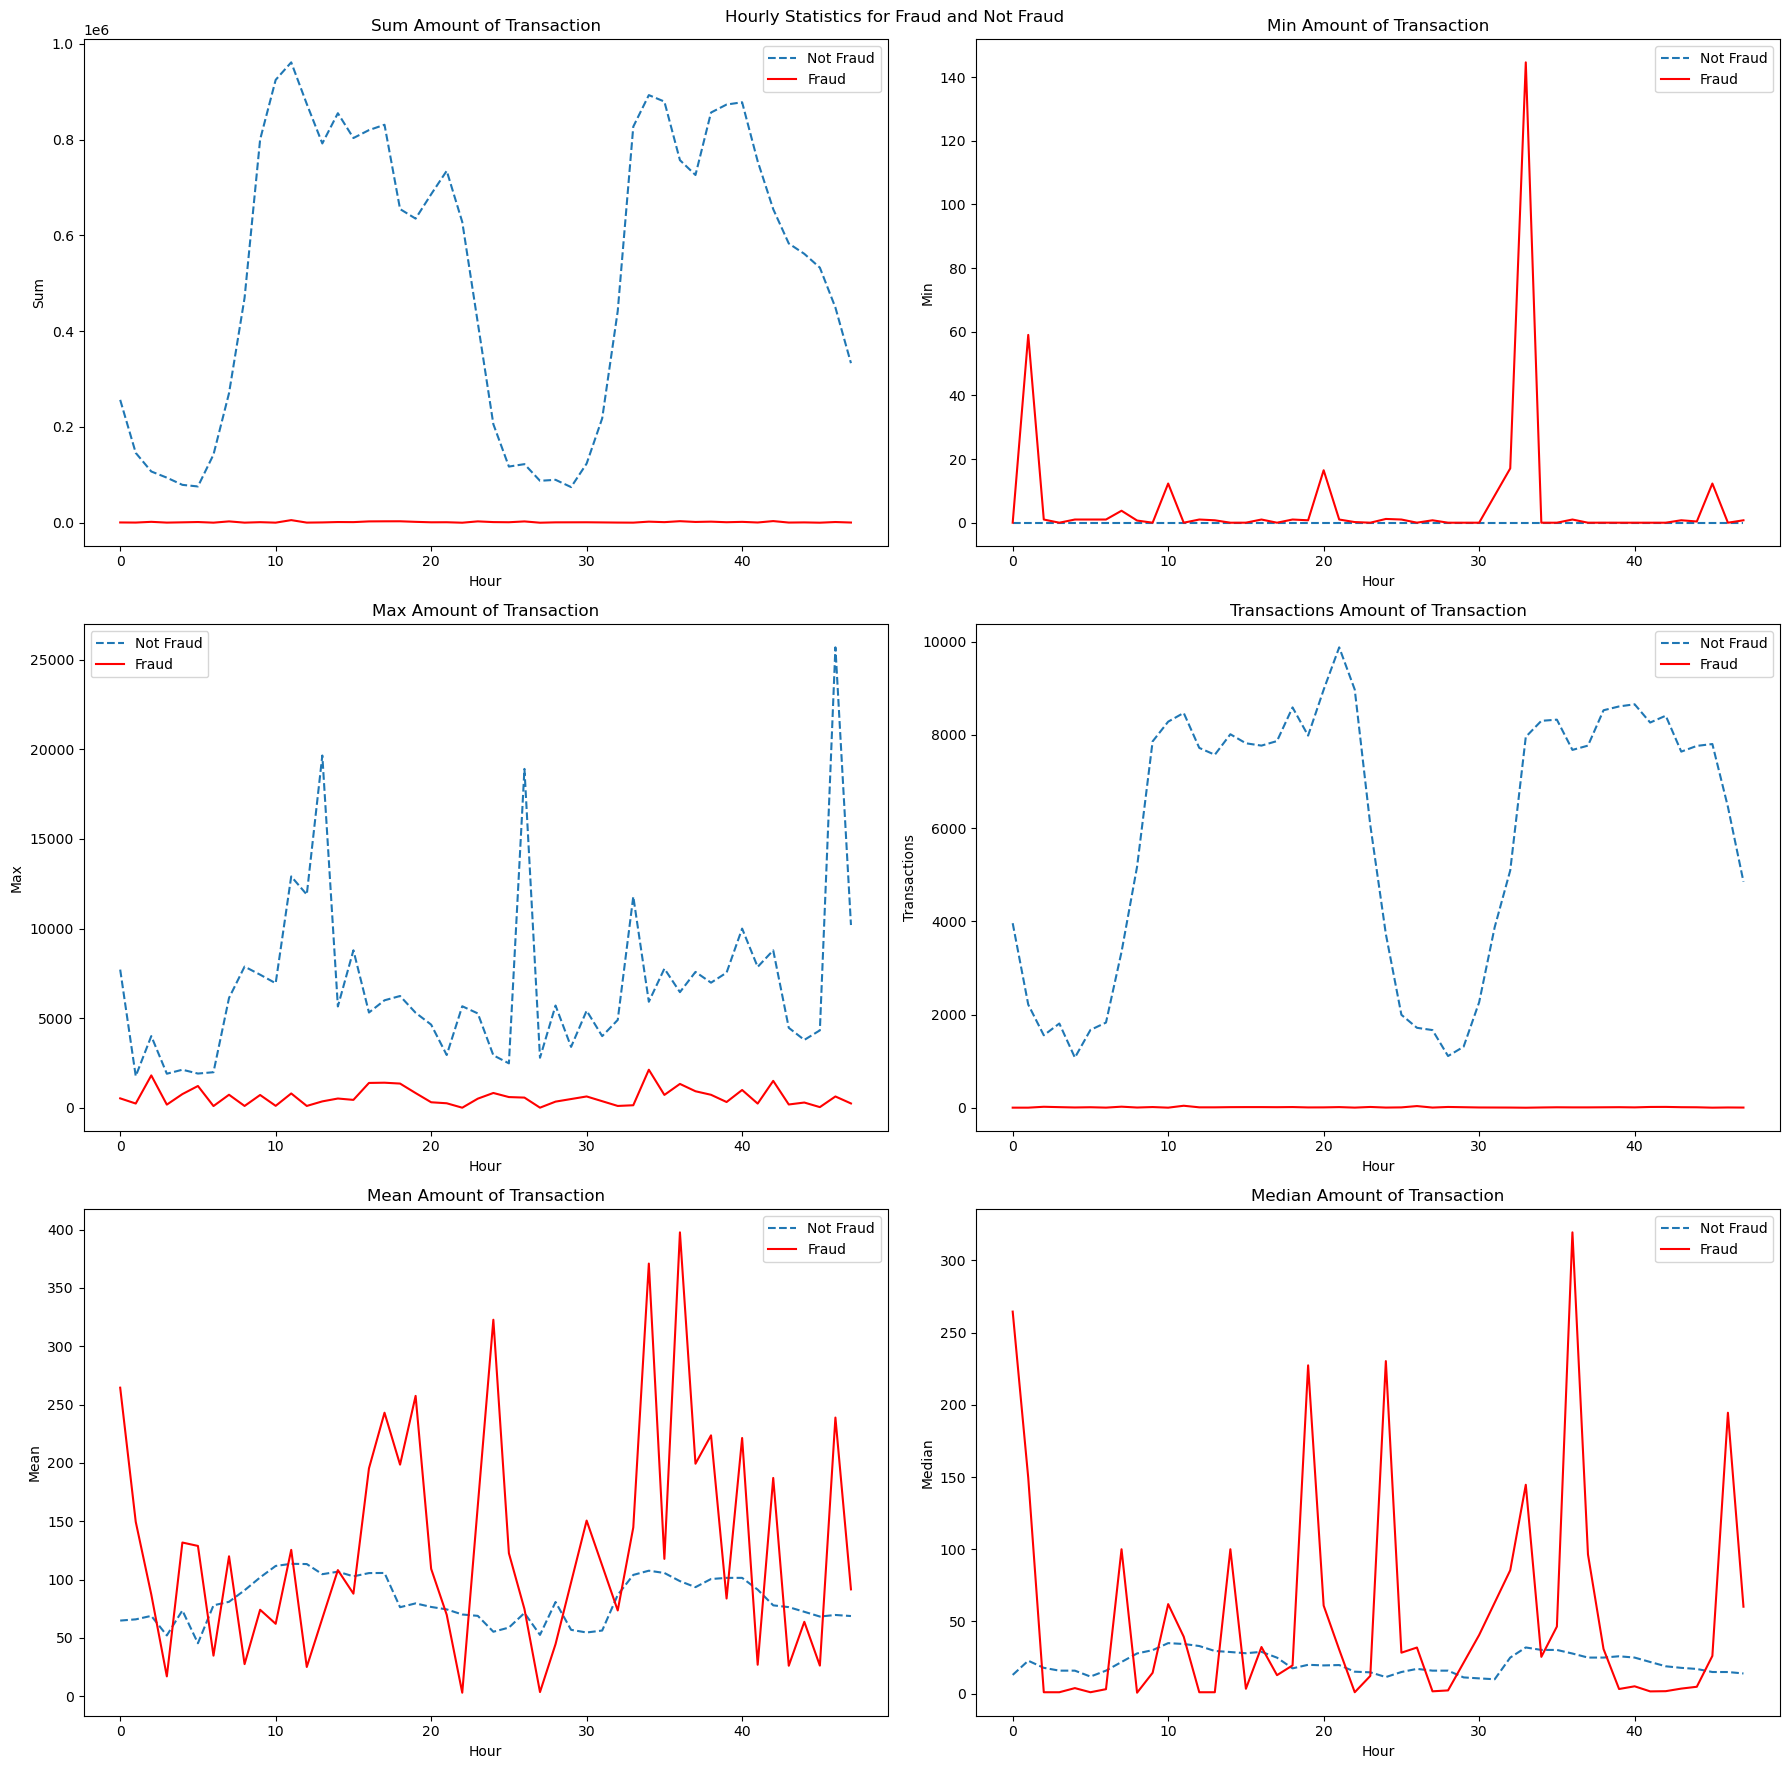

In [11]:
# Statistiques à inclure dans la boucle
statistics = ['Sum', 'Min', 'Max', 'Transactions', 'Mean', 'Median']

# Nombre de sous-graphiques
num_subplots = len(statistics)

# Calcul du nombre de lignes et de colonnes
num_rows = num_subplots // 2 + num_subplots % 2  # Pour gérer les cas impairs
num_cols = 2

# Création des sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))

# Boucle pour chaque statistique
for i, stat in enumerate(statistics):
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Graphique pour la statistique actuelle
    sns.lineplot(ax=axes[row_idx, col_idx], x="Hour", y=stat, data=dataagg.loc[dataagg.Class == 0], label="Not Fraud", linestyle='--')
    sns.lineplot(ax=axes[row_idx, col_idx], x="Hour", y=stat, data=dataagg.loc[dataagg.Class == 1], color="red", label="Fraud")

    # Titre et légende
    axes[row_idx, col_idx].set_title(f'{stat} Amount of Transaction')
    axes[row_idx, col_idx].legend()

# Ajustements supplémentaires si nécessaire
plt.suptitle("Hourly Statistics for Fraud and Not Fraud")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

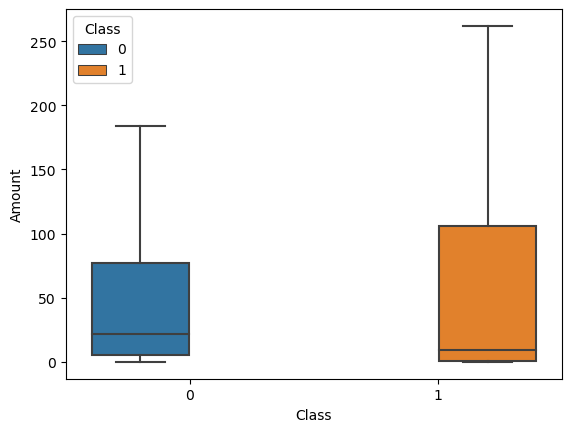

In [12]:
sns.boxplot(x="Class",y="Amount",data=data,hue="Class",showfliers=False)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

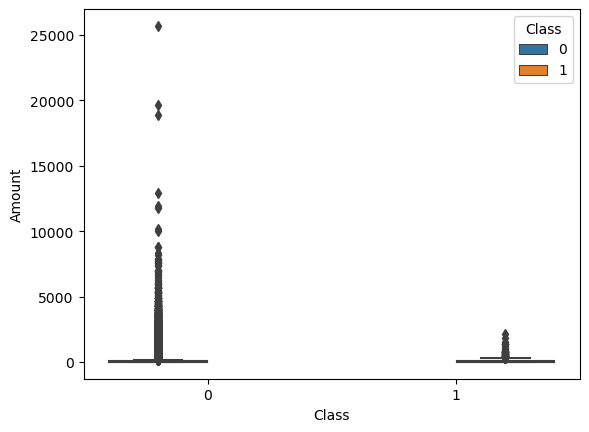

In [13]:
sns.boxplot(x="Class",y="Amount",data=data,hue="Class",showfliers=True)

In [14]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

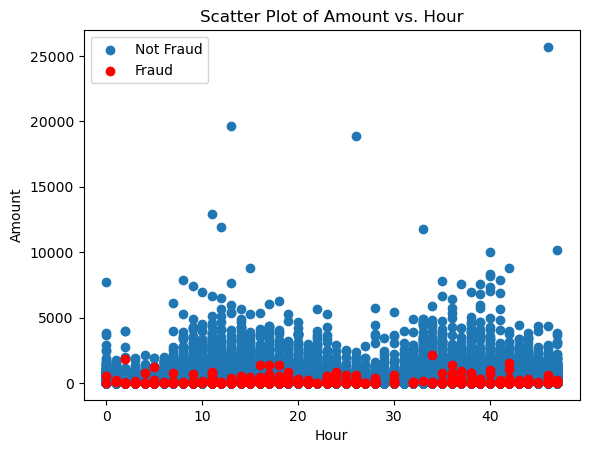

In [16]:
class_0_data = data.loc[data['Class'] == 0]
class_1_data = data.loc[data['Class'] == 1]

# Scatter plot
plt.scatter(x=class_0_data["Hour"], y=class_0_data["Amount"], label="Not Fraud")
plt.scatter(x=class_1_data["Hour"], y=class_1_data["Amount"], label="Fraud", color="red")

# Ajouter des étiquettes, titre, légende, etc.
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.title("Scatter Plot of Amount vs. Hour")
plt.legend()
plt.show()

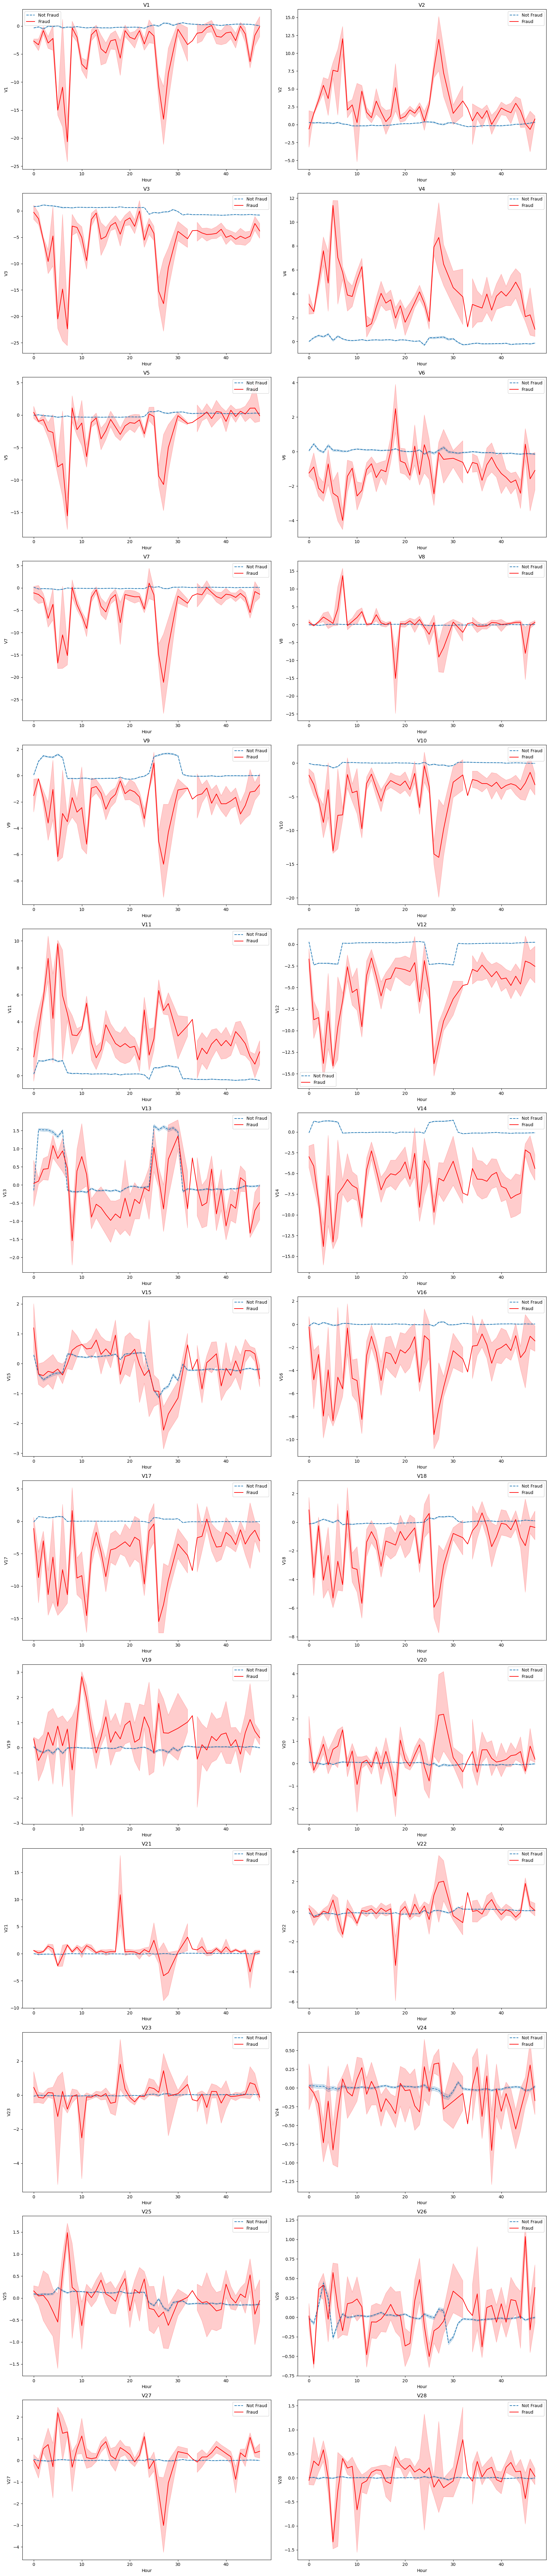

In [17]:
col = list(data.columns.values)

# Colonnes à exclure
exclude_columns = ['Time', 'Amount', 'Class', 'Hour']

# Créer une nouvelle liste sans les colonnes à exclure
col = [c for c in col if c not in exclude_columns]

num_subplots = len(col)

# Calcul du nombre de lignes et de colonnes
num_rows = num_subplots // 2 + num_subplots % 2  # Pour gérer les cas impairs
num_cols = 2

# Création des sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))

# Boucle pour chaque statistique
for i, stat in enumerate(col):
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Graphique pour la statistique actuelle
    sns.lineplot(ax=axes[row_idx, col_idx], x="Hour", y=stat, data=data.loc[data.Class == 0], label="Not Fraud", linestyle='--')
    sns.lineplot(ax=axes[row_idx, col_idx], x="Hour", y=stat, data=data.loc[data.Class == 1], color="red", label="Fraud")

    # Titre et légende
    axes[row_idx, col_idx].set_title(stat)
    axes[row_idx, col_idx].legend()

# Ajustements supplémentaires si nécessaire
plt.tight_layout()
plt.show()

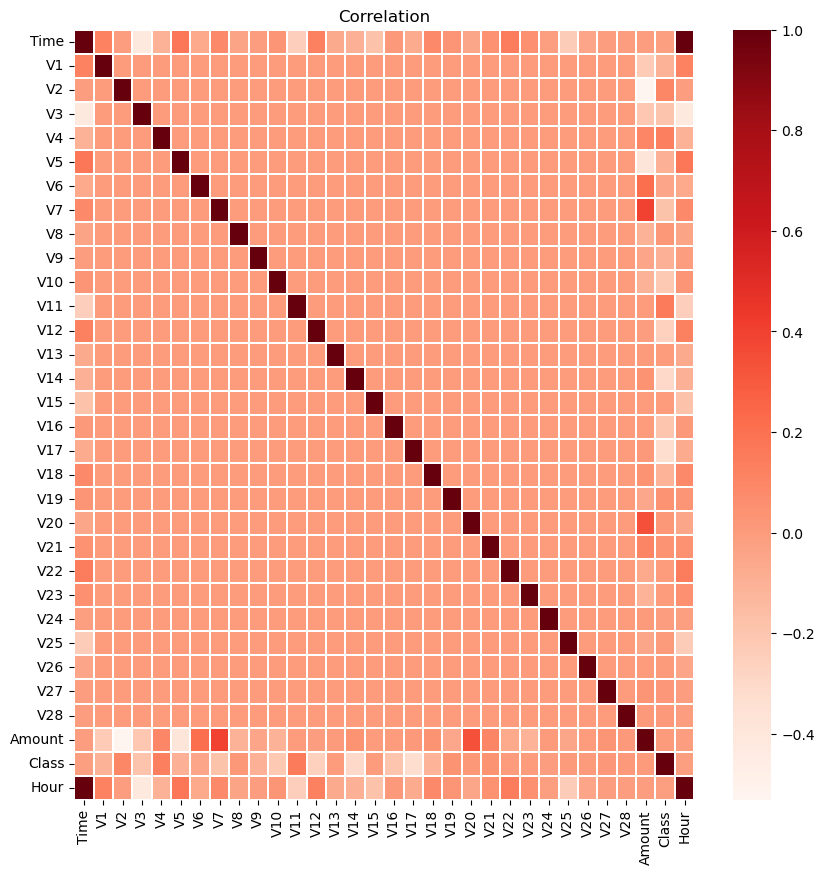

In [18]:
plt.figure(figsize=(10,10))
plt.title('Correlation')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

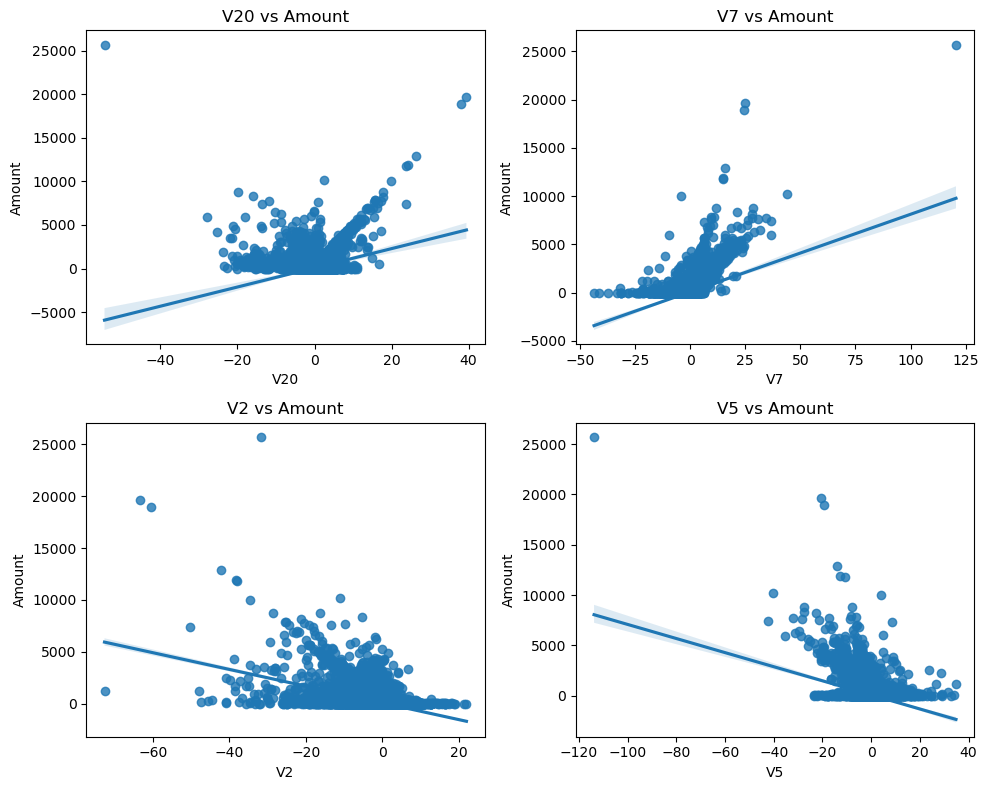

In [19]:
# Crée une figure et des axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Graphique 1
sns.regplot(x='V20', y='Amount', data=data, fit_reg=True, ax=axes[0, 0])
axes[0, 0].set_title('V20 vs Amount')

# Graphique 2
sns.regplot(x='V7', y='Amount', data=data, fit_reg=True, ax=axes[0, 1])
axes[0, 1].set_title('V7 vs Amount')

# Graphique 3
sns.regplot(x='V2', y='Amount', data=data, fit_reg=True, ax=axes[1, 0])
axes[1, 0].set_title('V2 vs Amount')

# Graphique 4
sns.regplot(x='V5', y='Amount', data=data, fit_reg=True, ax=axes[1, 1])
axes[1, 1].set_title('V5 vs Amount')

# Ajuste l'espace entre les graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

<Figure size 640x480 with 0 Axes>

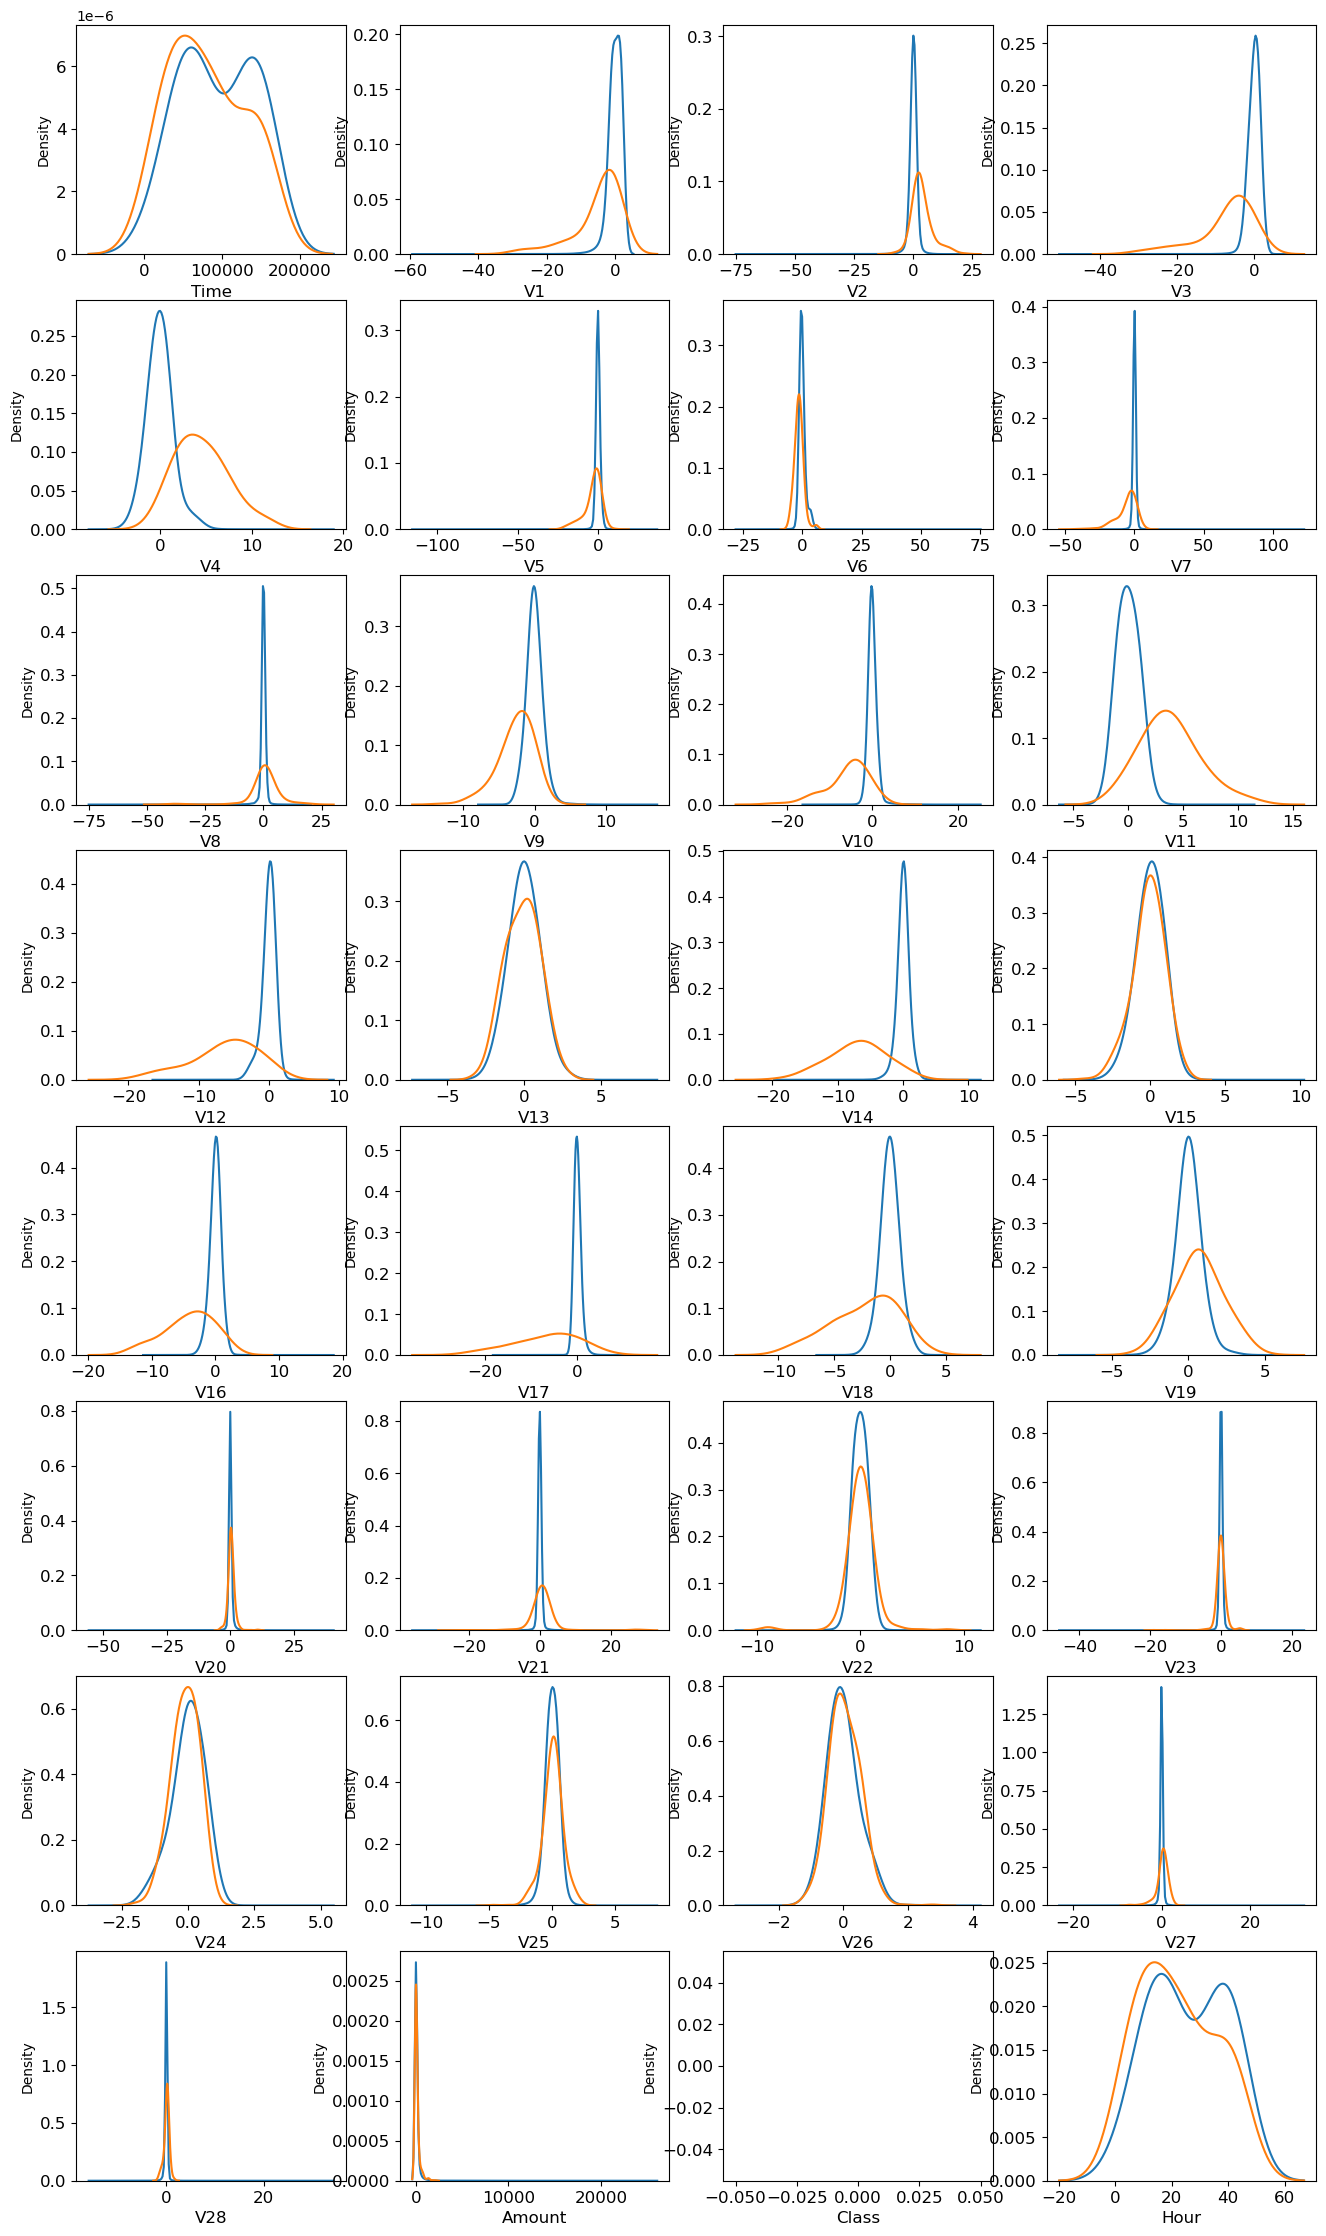

In [20]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

## Modeling

### RandomForest

In [21]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Time','Hour',"Class"],axis=1),data["Class"],test_size=0.3,random_state=1)
RF = RandomForestClassifier(n_jobs=4, random_state=1, criterion='gini', n_estimators= 100, verbose= False)
RF.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=1, verbose=False)

In [23]:
pred = RF.predict(X_test)

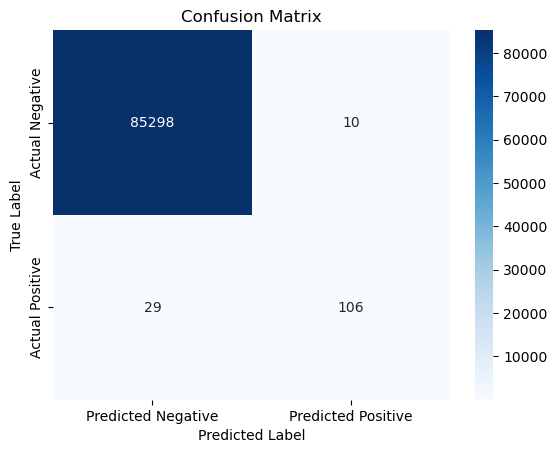

In [24]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.79      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
roc_auc_score(y_test, pred)

0.8925339814424075

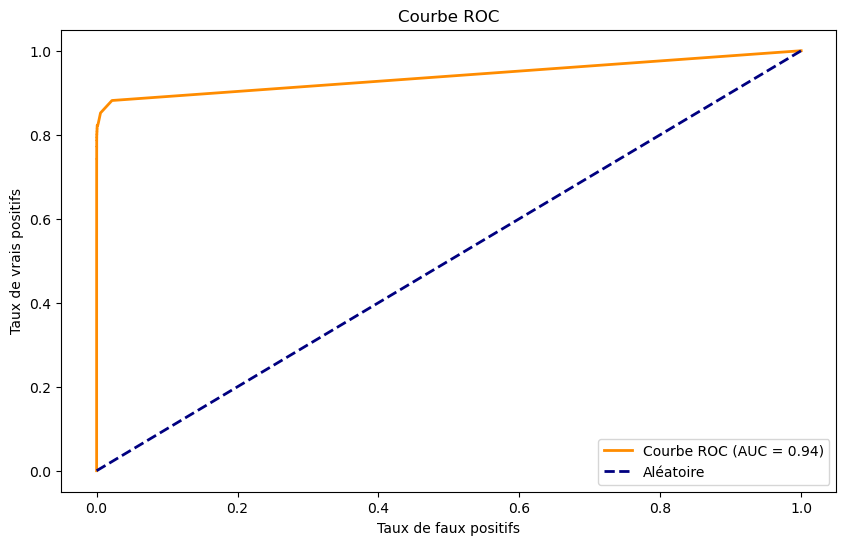

In [27]:
y_scores = RF.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Dessiner la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

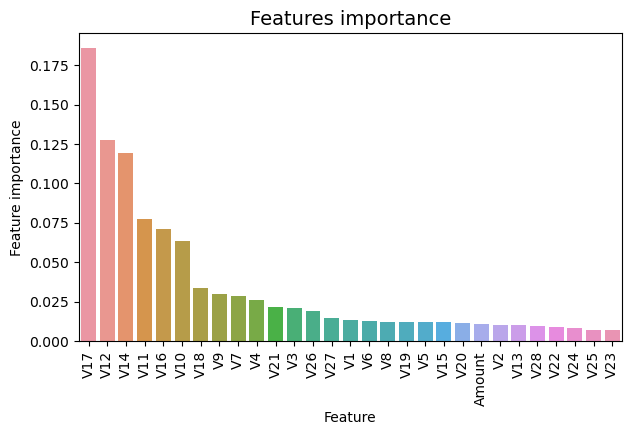

In [28]:
tmp = pd.DataFrame({'Feature': data.drop(['Time','Hour',"Class"],axis=1).columns, 'Feature importance': RF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### AdaBoost Classifier

In [37]:
Ad = AdaBoostClassifier(random_state=1,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                        n_estimators=100)

Ad.fit(X_train, y_train)
pred = Ad.predict(X_test)

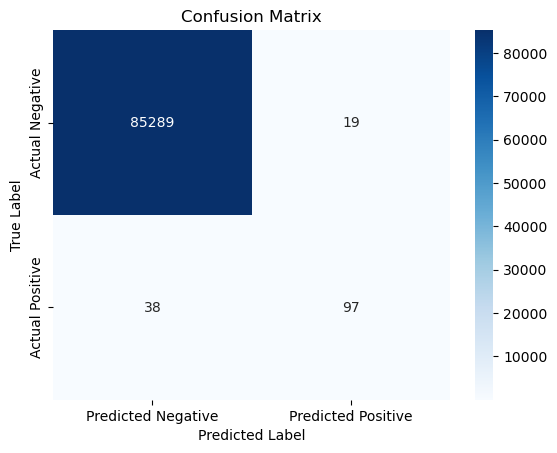

In [38]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.72      0.77       135

    accuracy                           1.00     85443
   macro avg       0.92      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [40]:
roc_auc_score(y_test, pred)

0.8591478980739075

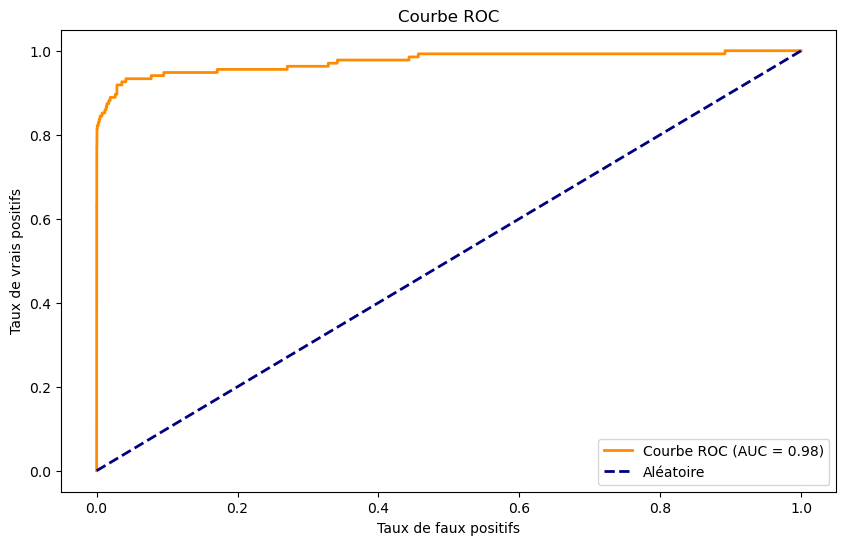

In [41]:
y_scores = Ad.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Dessiner la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

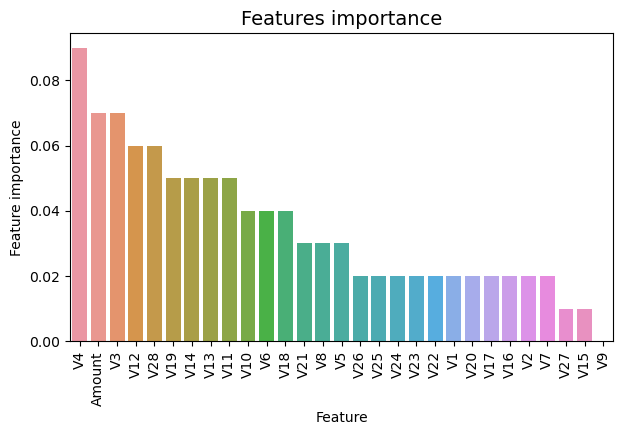

In [42]:
tmp = pd.DataFrame({'Feature': data.drop(['Time','Hour',"Class"],axis=1).columns, 'Feature importance': Ad.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### CatBoost Classifier

In [ ]:
Ct = CatBoostClassifier(iterations=200,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 1,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

Ct.fit(X_train, y_train)
pred = Ad.predict(X_test)

0:	total: 576ms	remaining: 1m 54s
50:	total: 37.8s	remaining: 1m 50s


In [ ]:
# Assuming pred is your model's predictions on the test set
conf_matrix = confusion_matrix(y_test, pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print the classification report
print(classification_report(y_test, pred))

In [ ]:
roc_auc_score(y_test, pred)

In [ ]:
y_scores = Ct.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Dessiner la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
tmp = pd.DataFrame({'Feature': data.drop(['Time','Hour',"Class"],axis=1).columns, 'Feature importance': Ct.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()